In [233]:
# Import of necessary liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [234]:
# Datasets used for that study

house_df = pd.read_excel('/data/notebook_files/datasets/house.xls')
irates_df = pd.read_csv('/data/notebook_files/datasets/BOE.csv')

In [235]:
house_df

,"Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,New dwellings,NaN,Other dwellings4,NaN,All dwellings,NaN,First time buyers,NaN,Former owner occupiers
2,NaN,NaN,NaN,NaN,Price,NaN,Price,NaN,Price,NaN,Price,NaN,Price
3,NaN,NaN,NaN,NaN,£,NaN,£,NaN,£,NaN,£,NaN,£
4,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,Contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Source: Regulated Mortgage Survey
2030,Telephone: 01633 456400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
irates_df

,Date Changed,Rate
0,15 Dec 22,3.50
1,03 Nov 22,3.00
2,22 Sep 22,2.25
3,04 Aug 22,1.75
4,16 Jun 22,1.25
...,...,...
242,10 Mar 75,10.25
243,17 Feb 75,10.50
244,10 Feb 75,10.75
245,27 Jan 75,11.00


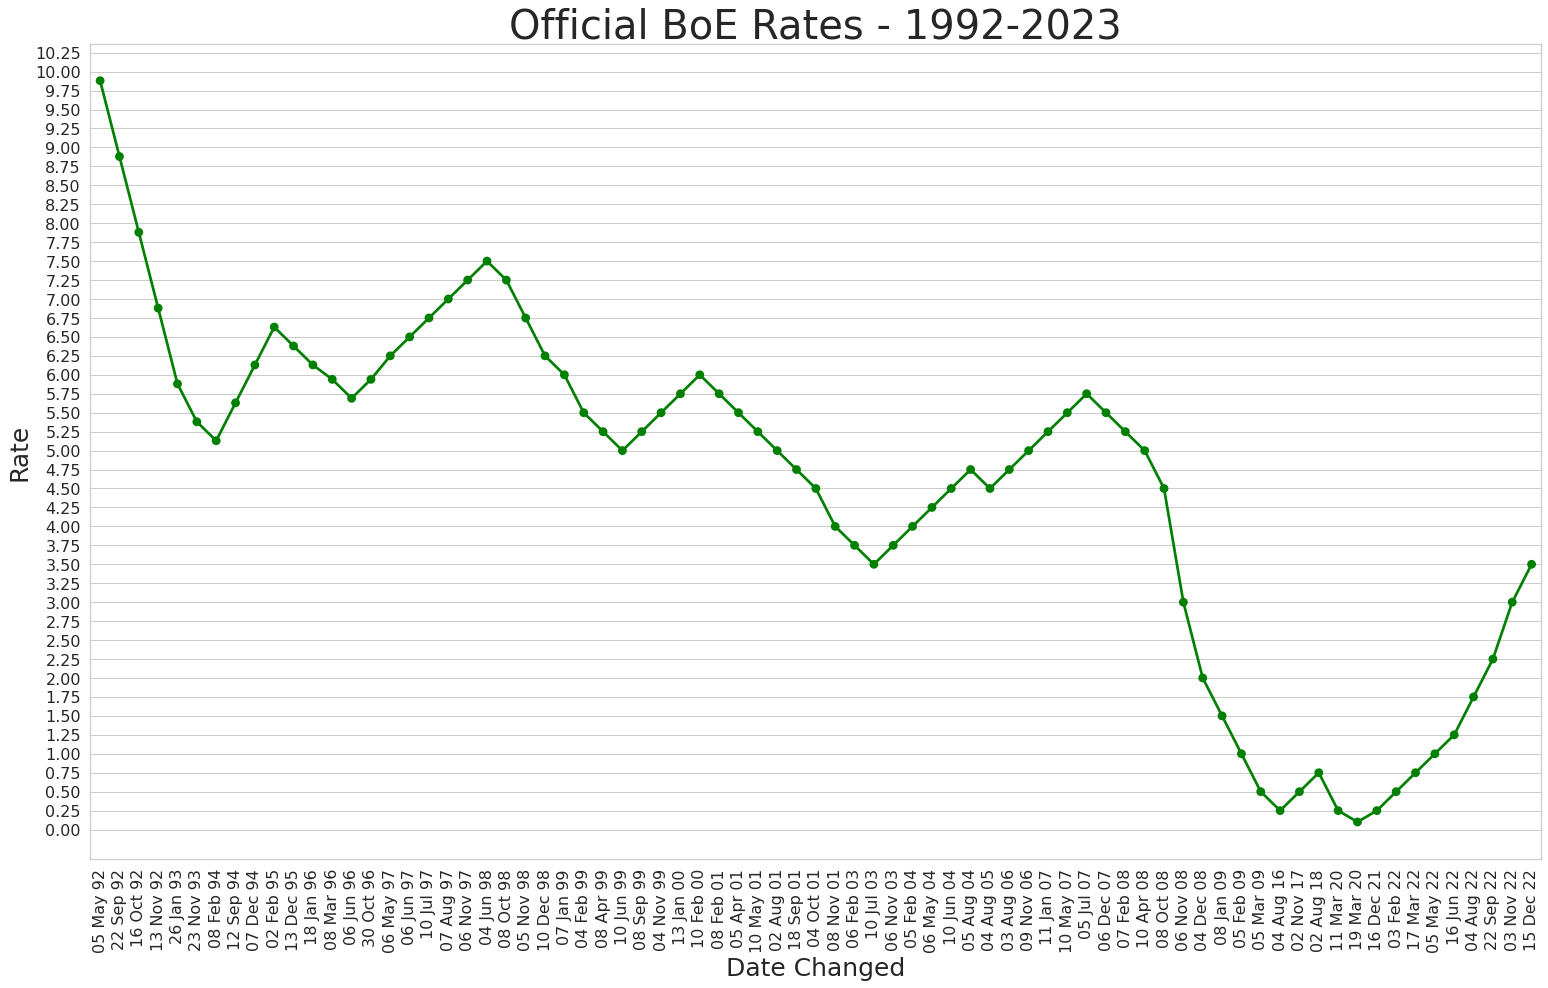

In [237]:
irates_df = irates_df.loc[0:74].sort_index(ascending=False)

import matplotlib.pyplot as plot1


plot1.figure(figsize=(26,15), facecolor='white')
plt.title("Official BoE Rates - 1992-2023", size=40)
plt.xlabel("Year", fontsize=25, )
plt.ylabel("Rate (%)", fontsize=25)
plt.yticks(np.arange(0,11, step=0.25), fontsize=16)
plt.xticks(rotation=90, fontsize=16)
sns.set_theme(style="whitegrid")
sns.pointplot(data= irates_df ,x="Date Changed",y="Rate",color='Green')

plt.show()

In [238]:
# Checking columns for empty rows

print("Missing values distribution:")
print(house_df.isnull().mean())
print("")

Missing values distribution:
Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)    0.980807
Unnamed: 1                                                                                                                                                                            0.753937
Unnamed: 2                                                                                                                                                                            0.031496
Unnamed: 3                                                                                                                                                                            1.000000
Unnamed: 4                                                                                                                                                                            0.037894
Unnamed: 5      

In [239]:
house_df3 = house_df.rename (columns=
{'Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)' : 'Region',
 'Unnamed: 1': 'Year',  
 'Unnamed: 2' : 'Quarter',
 'Unnamed: 4' : 'New dwellings',
 'Unnamed: 6' : 'Other dwellings',
 'Unnamed: 8' : 'All dwellings',
 'Unnamed: 10' : 'First time buyers',
 'Unnamed: 12' : 'Former owner occupiers',
 })

house_df3 = house_df3.assign(Region=house_df3['Region'].shift(3))
house_df3['Year'] = house_df3['Year'].interpolate(method='pad', limit=3)

column_names = ('Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers')

def covert_to_int(dataframe,name):
        return pd.to_numeric(dataframe[name],errors='coerce').fillna(0).astype(int)
        
for value in column_names:
    house_df3[value]=covert_to_int(house_df3,value)

house_df3.drop(columns=['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11'], inplace=True)
house_df3.drop(np.r_[0:7,2019:2032], inplace=True)

columns = ['Region','Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers' ]

for column in columns:
    house_df3[column] = house_df3[column].fillna("")
    
    
house_df3

,Region,Year,Quarter,New dwellings,Other dwellings,All dwellings,First time buyers,Former owner occupiers
7,United Kingdom,1992,Q2,77360,60210,62255,46919,76988
8,K02000001,1992,Q3,69893,62513,63712,48578,79493
9,,1992,Q4,70043,57193,59230,44831,76992
10,,1993,Q1,72700,58345,60213,46300,77787
11,,1993,Q2,73289,60196,61895,48566,78151
...,...,...,...,...,...,...,...,...
2014,,2021,Q3,202498,174913,179935,150733,220168
2015,,2021,Q4,197388,165070,171830,148031,215325
2016,,2022,Q1,215044,178526,184707,151759,239818
2017,,2022,Q2,225815,182400,190623,157540,246209


In [240]:
#Creating dataframe for each area ( 15 in total):
#4 
house_df_United_Kingdom = house_df3.loc[0:128]
house_df_Great_Britain = house_df3.loc[133:254]
house_df_England_Wales = house_df3.loc[295:380]
house_df_England = house_df3.loc[385:506]
#11
#Regions:
house_df_North_East = house_df3.loc[511:632]
house_df_Yorkshire = house_df3.loc[763:884]
house_df_East_Midlands = house_df3.loc[889:1010]
house_df_West_Midlands = house_df3.loc[1015:1136]
house_df_East_England = house_df3.loc[1141:1262]
house_df_London = house_df3.loc[1267:1388]
house_df_South_East = house_df3.loc[1393:1514]
house_df_South_West = house_df3.loc[1519:1640]
house_df_Wales = house_df3.loc[1645:1766]
house_df_Scotland = house_df3.loc[1771:1892]
house_df_N_Ireland = house_df3.loc[1897:2018]

In [241]:
def average_price(df, col):
    return df[col].mean() 


def median_price(df, col):
    return df[col].median()



def lowest_price_info(df, coll, col1, col2):
    min_price = df[coll].min()
    column1 = df.loc[df[coll] == min_price, col1].iloc[0]
    column2 = df.loc[df[coll] == min_price, col2].iloc[0]
    return column1, column2, min_price


def highest_price_info(df, colh, col3, col4):
    max_price = df[colh].max()
    column3 = df.loc[df[colh] == max_price, col3].iloc[0]
    column4 = df.loc[df[colh] == max_price, col4].iloc[0]
    return column3, column4, max_price


class Country:
    def __init__ (self, database, name):
        self.database = database
        self.name = name
                 
    

                
countries = [Country(house_df_United_Kingdom,'1.United Kingdom'),
             Country(house_df_Great_Britain,'2.Great Britain'),
             Country(house_df_England_Wales,'3.England Wales'),
             Country(house_df_England,'4.England'),
             Country(house_df_North_East,'5.North East'),
             Country(house_df_Yorkshire,'6.Yorkshire'),
             Country(house_df_East_Midlands,'7.East Midlands'),
             Country(house_df_West_Midlands,'8.West Midlands'),
             Country(house_df_East_England,'9.East England'),
             Country(house_df_London,'10.London'), 
             Country(house_df_South_East,'11.South East'),
             Country(house_df_South_West,'12.South West'),
             Country(house_df_Wales,'13.Wales'),
             Country(house_df_Scotland,'14.Scotland'),
             Country(house_df_N_Ireland,'15.Northen Ireland'),
             
]
             
    
print("Peak change in nominal simple average values \nof the properties within 30 years period (1992-2022):\n")



for country in countries:
    print("-----------------------------------------------")
    print(country.name)
    col1, col2, min_price = lowest_price_info(country.database,'All dwellings','Year','Quarter')
    col3, col4, max_price = highest_price_info(country.database,'All dwellings','Year','Quarter')
    print('Lowest average price: ',min_price,"GBP", (col2, col1)), 
    print('Highest average price: ', max_price,"GBP", (col4, col3))
    
    Difference = max_price - min_price
    Percent = int(Difference/min_price*100)
    print("Price difference:", Difference, Percent,"%")
    print('Average price: ', average_price(country.database,'All dwellings'))
    print('Median price: ', median_price(country.database,'All dwellings'))







Peak change in nominal simple average values 
of the properties within 30 years period (1992-2022):

-----------------------------------------------
1.United Kingdom
Lowest average price:  59230 GBP ('Q4', 1992)
Highest average price:  353532 GBP ('Q3', 2022)
Price difference: 294302 496 %
Average price:  191779.7213114754
Median price:  217170.5
-----------------------------------------------
2.Great Britain
Lowest average price:  59796 GBP ('Q4', 1992)
Highest average price:  357364 GBP ('Q3', 2022)
Price difference: 297568 497 %
Average price:  193177.8524590164
Median price:  217452.0
-----------------------------------------------
3.England Wales
Lowest average price:  116936 GBP ('Q2', 2001)
Highest average price:  368861 GBP ('Q3', 2022)
Price difference: 251925 215 %
Average price:  248473.36046511628
Median price:  251690.5
-----------------------------------------------
4.England
Lowest average price:  61333 GBP ('Q4', 1992)
Highest average price:  374920 GBP ('Q3', 2022)
Pri

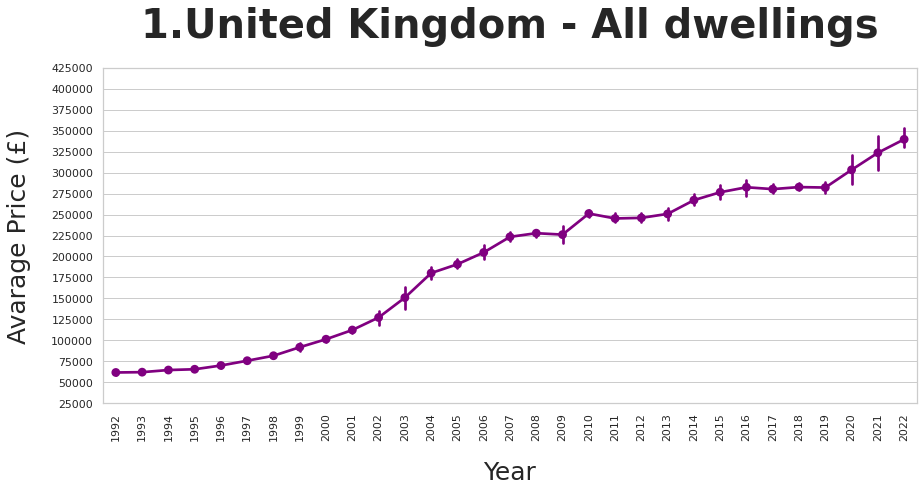

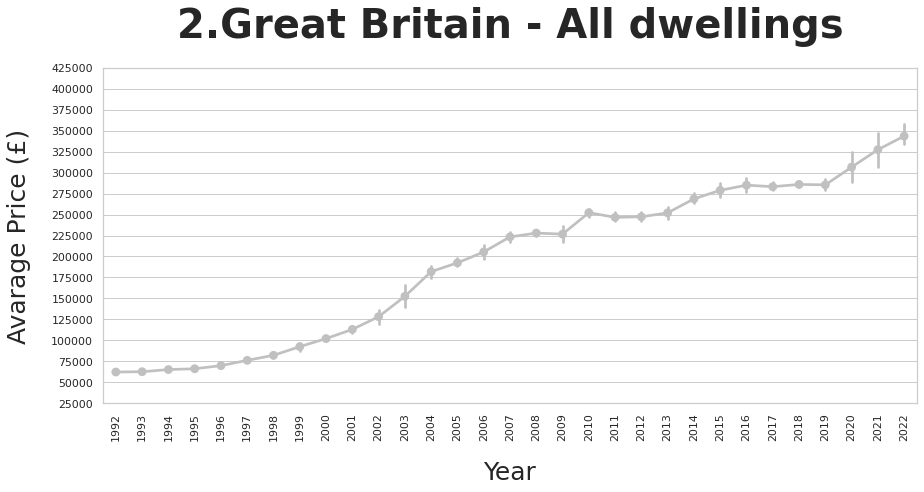

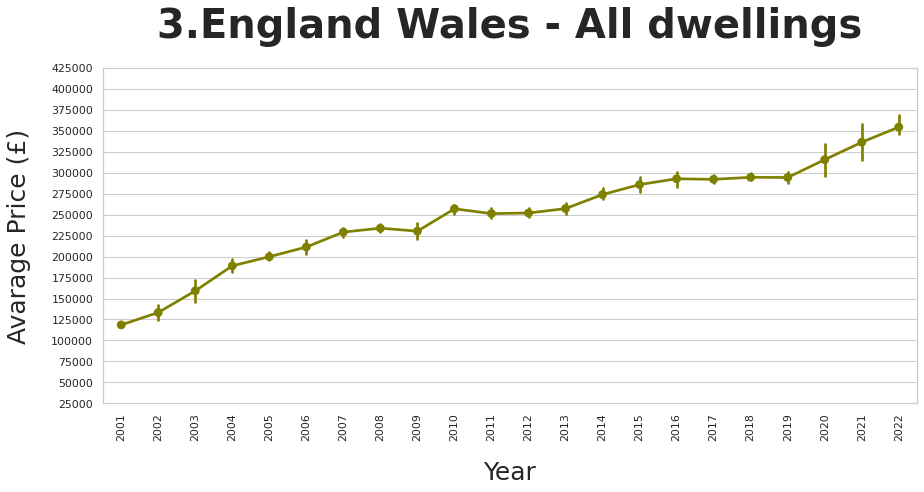

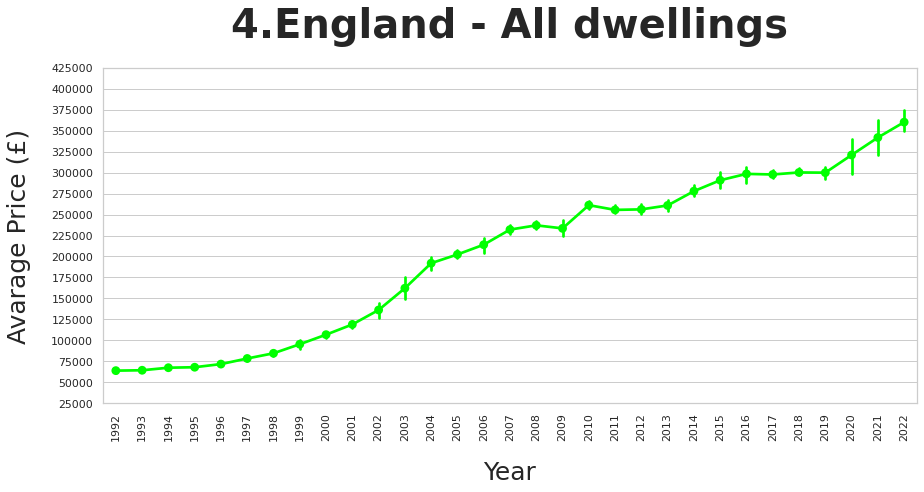

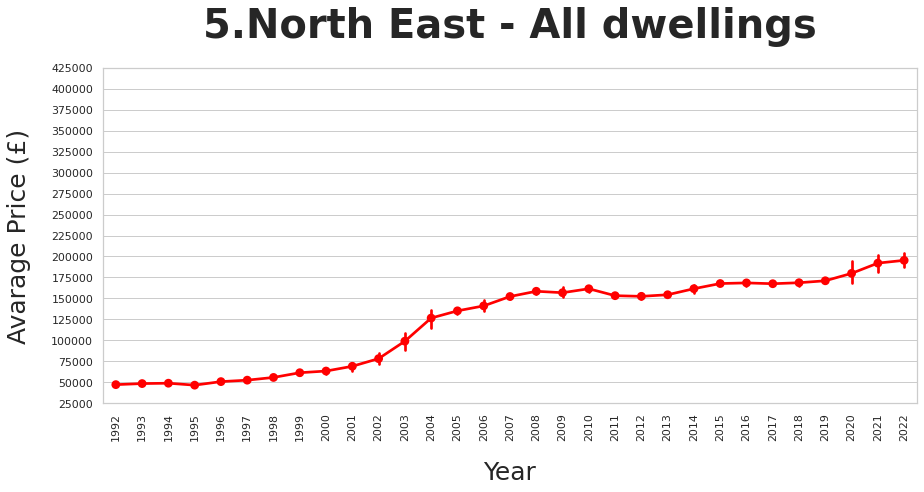

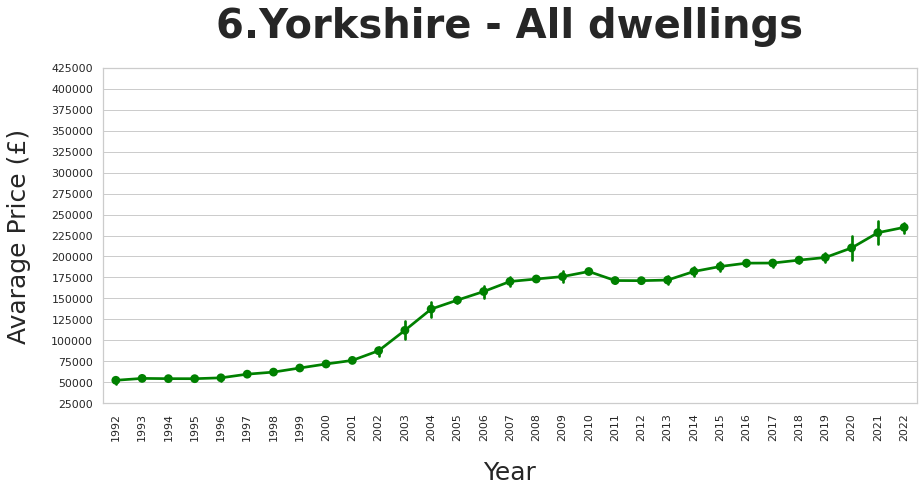

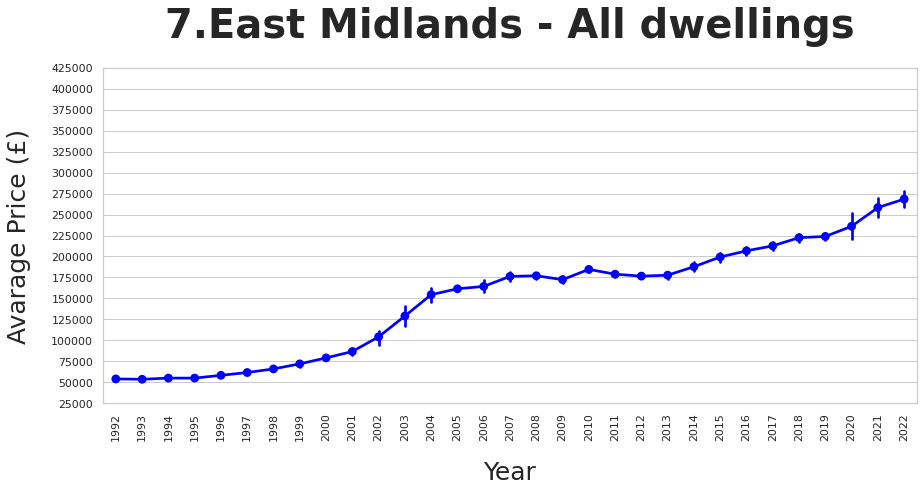

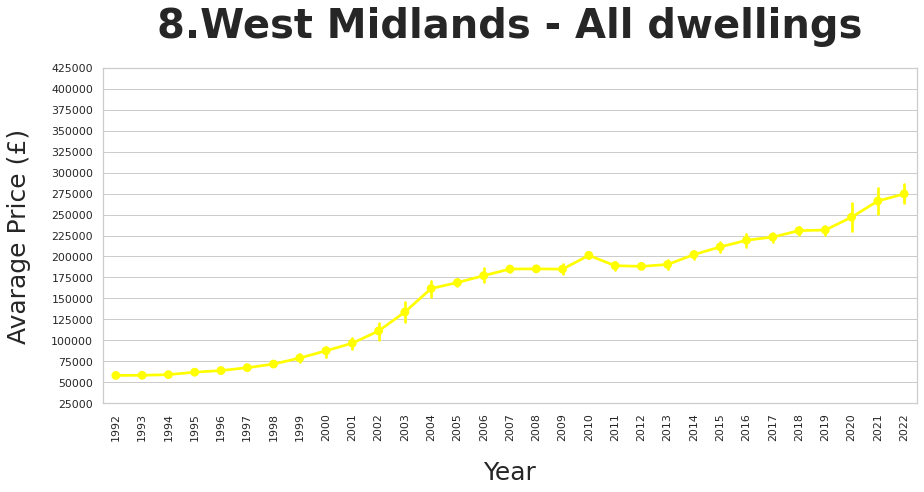

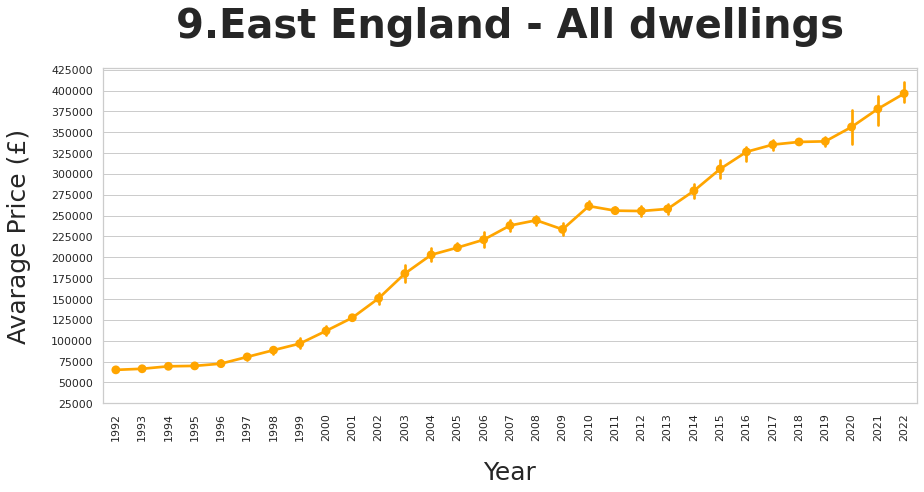

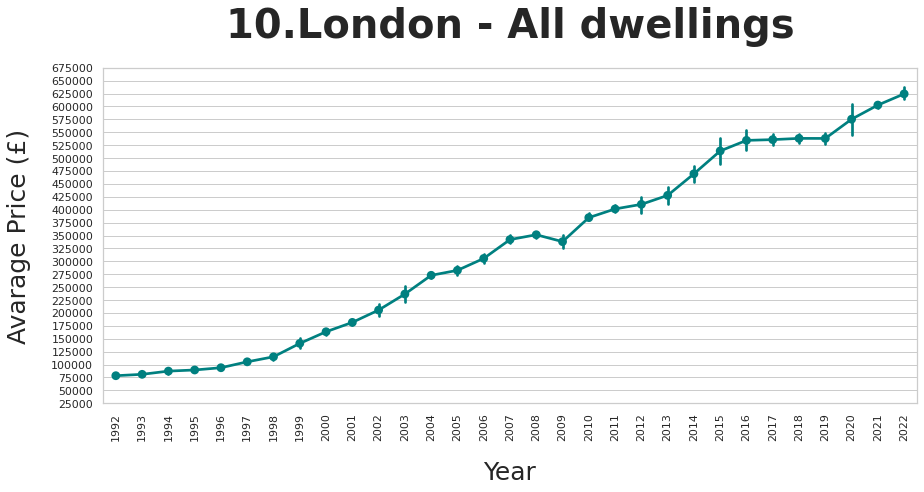

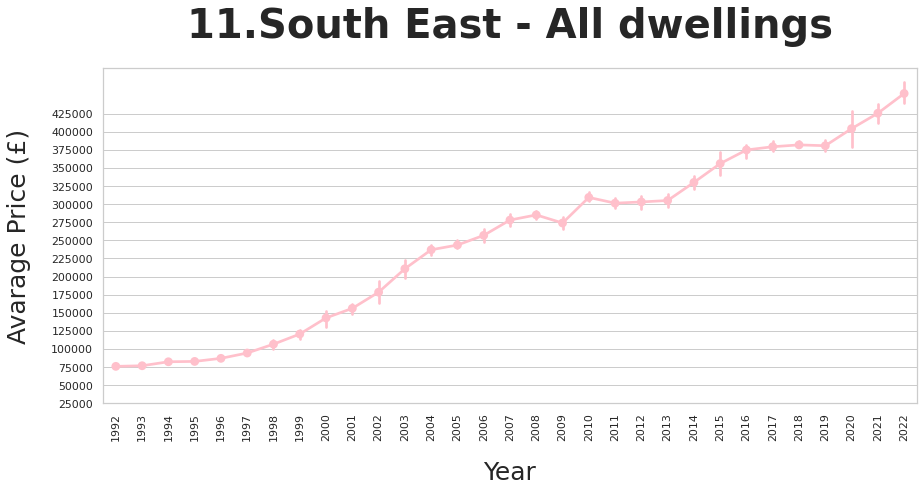

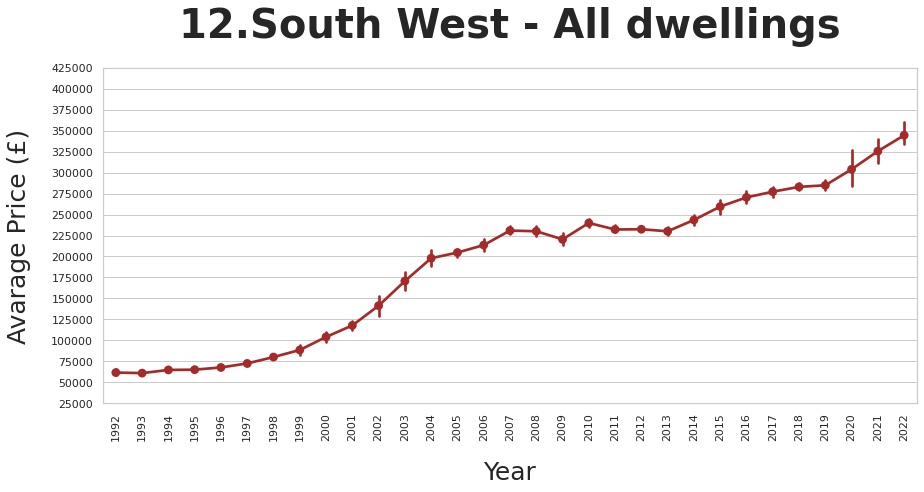

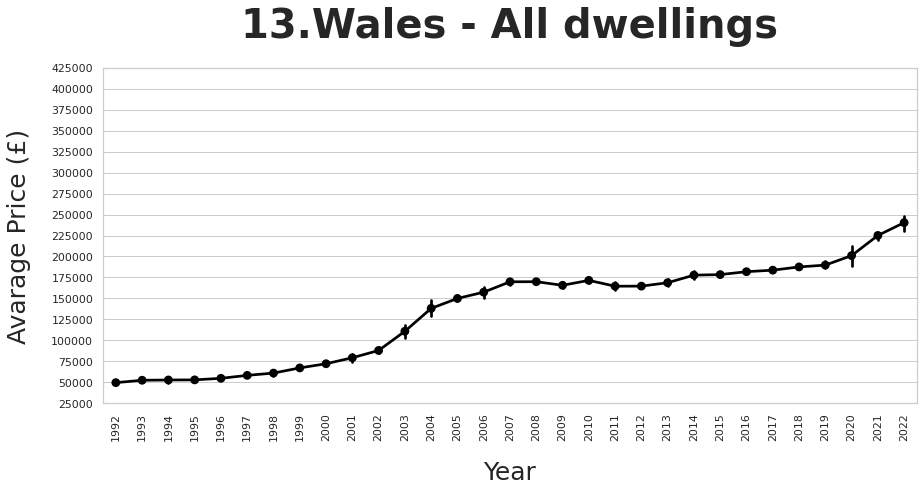

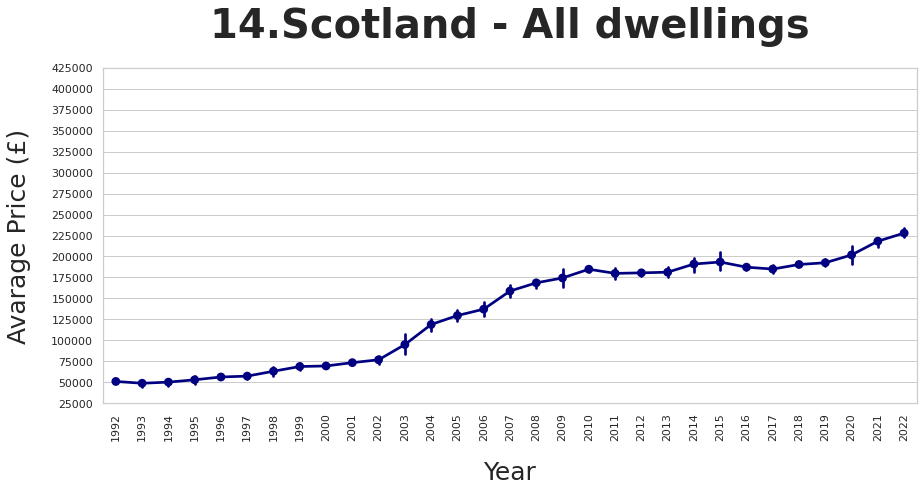

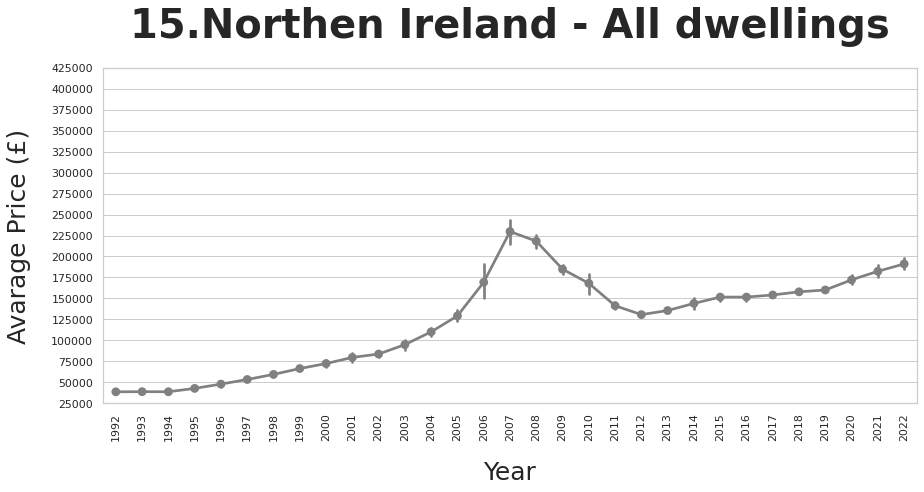

In [242]:
colors = ["Purple", "Silver","Olive", "Lime","Red", "Green", "Blue", "Yellow","Orange", "Teal", "Pink", "Brown", "Black", "Navy", "Gray"]



def show_graph(dataframe,name,color,ymax=None):
    default_ymax = 450000
    if ymax is not None:
        default_ymax=ymax
    plt.figure(num=1,figsize=(13,7), layout='tight',facecolor='white')
    sns.set_theme(style="whitegrid")
    sns.pointplot(data=dataframe, x='Year', y='All dwellings', color=color)
    plt.title('%s - All dwellings'% name, size=40,pad=30, weight='heavy')
    plt.xlabel("Year", fontsize=25, labelpad=20)
    plt.xticks(rotation=90)
    plt.ylabel("Avarage Price (£)", fontsize=25,labelpad=20)
    plt.yticks(np.arange(25000,default_ymax, step=25000))
    plt.show()
    



for (color, country) in zip(colors,countries):
    if country.name == '10.London':
        show_graph(country.database,country.name,color,700000)
    else: 
        show_graph(country.database,country.name,color)

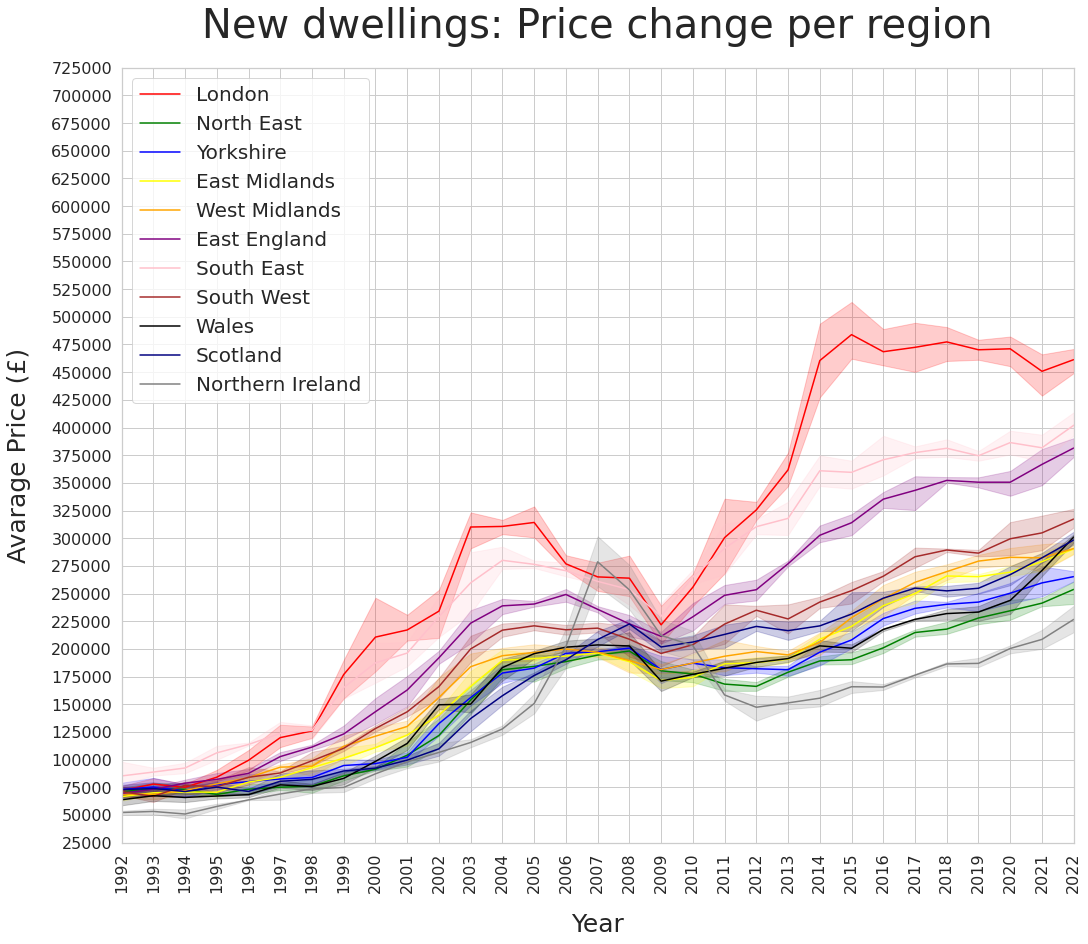

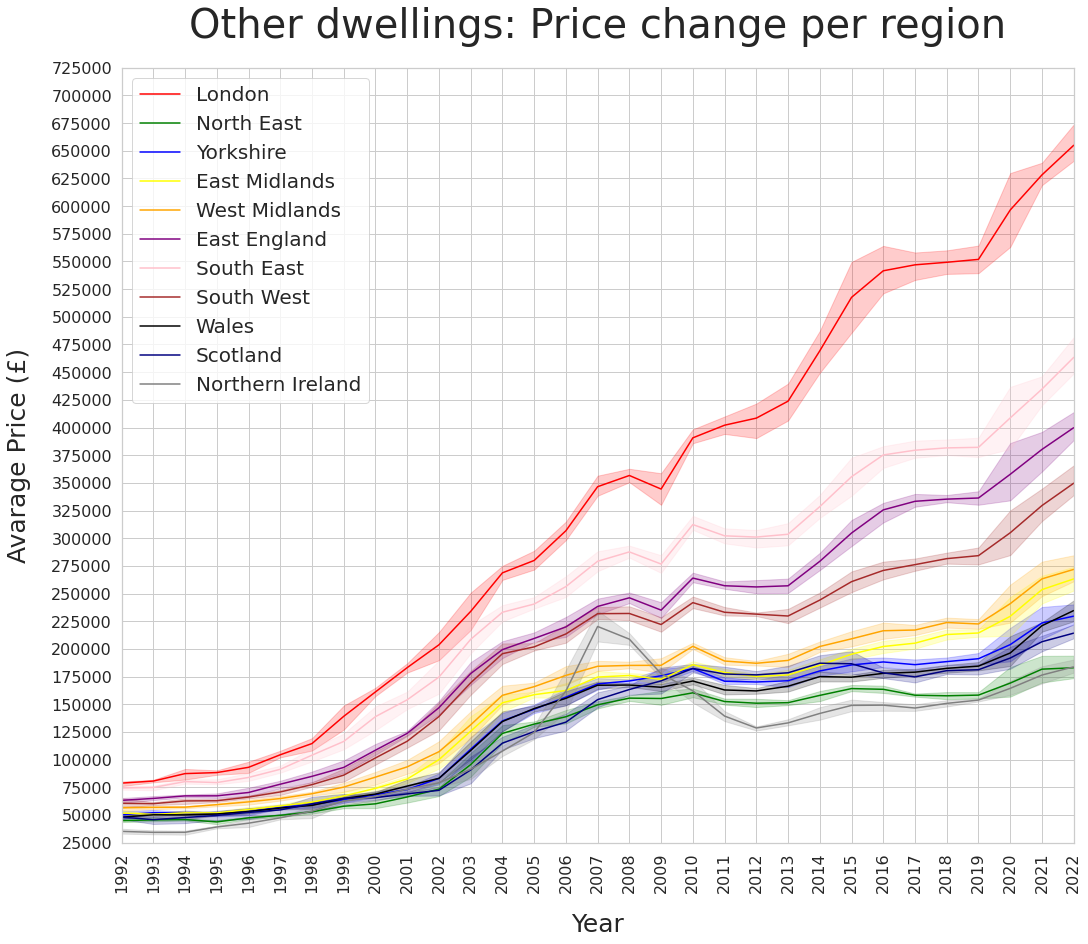

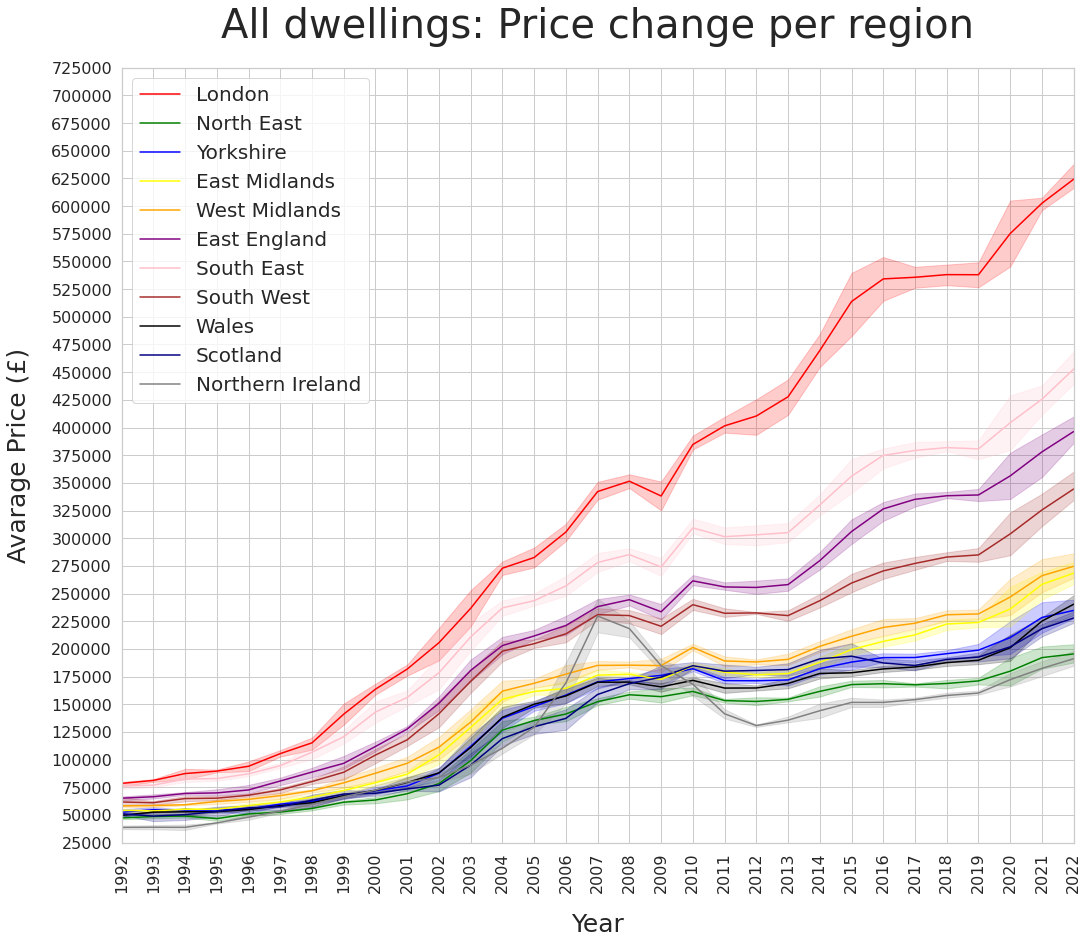

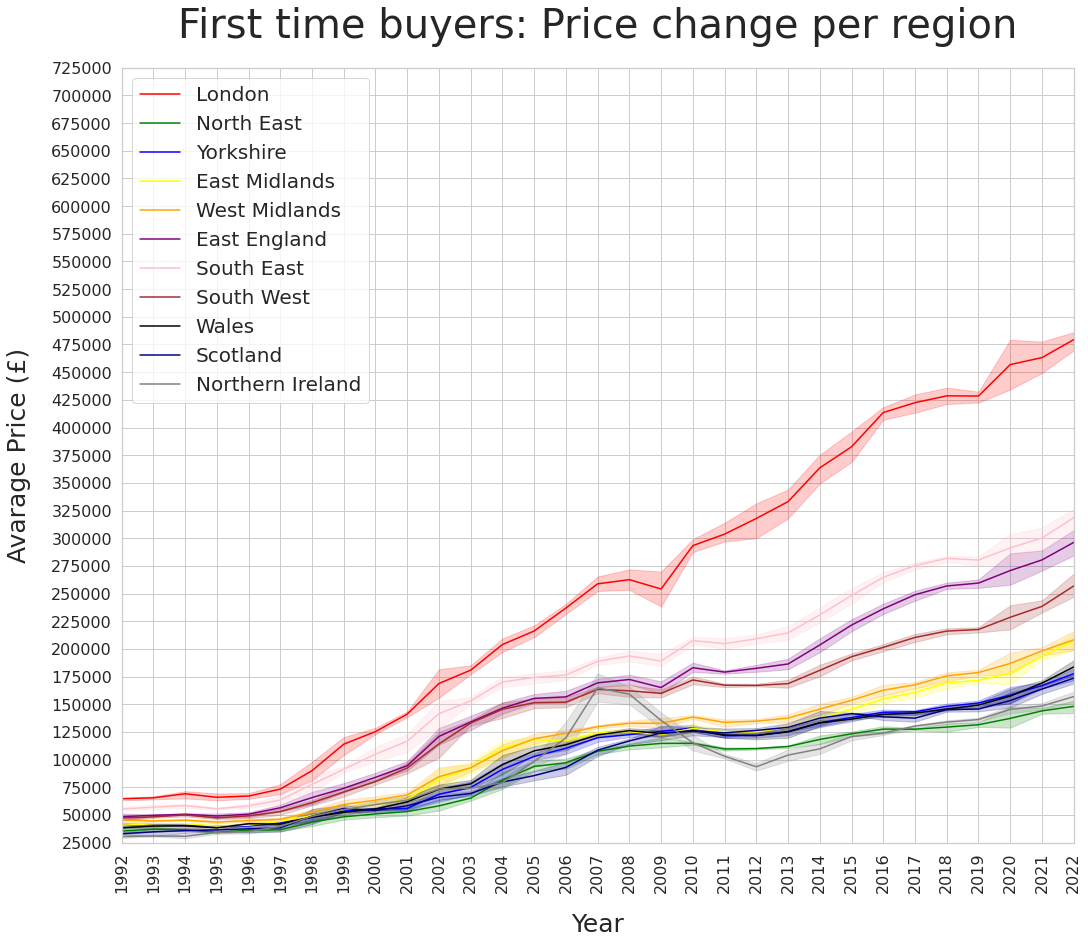

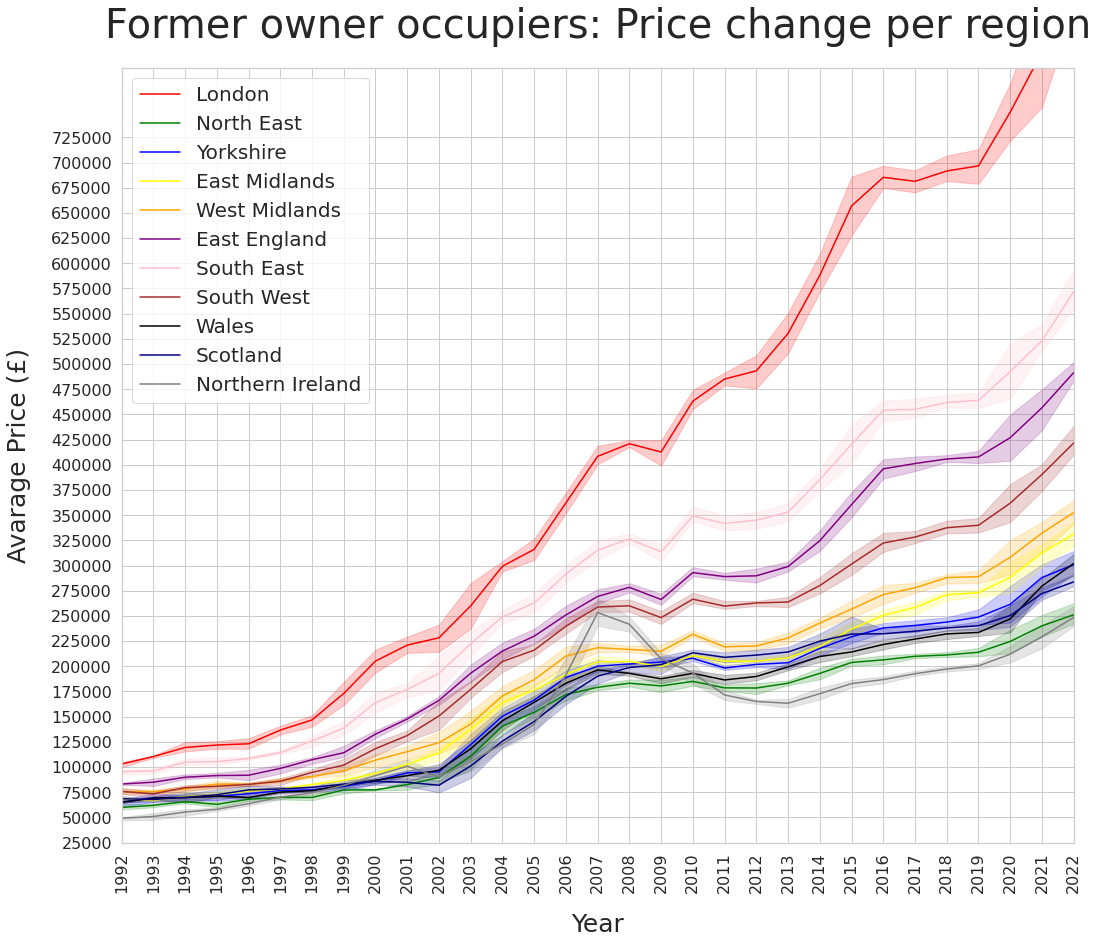

In [243]:

databases = [house_df_London,house_df_North_East,house_df_Yorkshire,house_df_East_Midlands,house_df_West_Midlands,
             house_df_East_England,house_df_South_East,house_df_South_West,house_df_Wales,house_df_Scotland,house_df_N_Ireland]
labels = ['London','North East','Yorkshire','East Midlands','West Midlands','East England','South East','South West',
         'Wales','Scotland','Northern Ireland']
colors = ["Red", "Green", "Blue", "Yellow", "Orange", "Purple", "Pink", "Brown", "Black", "Navy", "Gray"]

columns = ['New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers']
    
def draw_lineplot(database,label,color,column):
    sns.lineplot(data= database ,x="Year",y=column,legend='full', label=label, color=color)

  
for column in columns:
    plt.figure(figsize=(15,13), layout='constrained', facecolor='white')
    sns.set_theme(style="whitegrid")

    for (database, label, color) in zip(databases, labels, colors):
        draw_lineplot(database,label,color,column)
    
    plt.title('%s: Price change per region' % column, size=40,pad=30)
    plt.margins(x=-0.1, y=-0.1)
    plt.legend(fontsize=20)
    plt.xlabel("Year", fontsize=25, labelpad=20)
    plt.xticks(np.arange(1992,2023,step=1), rotation=90, fontsize=16)
    plt.ylabel("Avarage Price (£)", fontsize=25,labelpad=20)
    plt.yticks(np.arange(25000,750000, step=25000), fontsize=16)
    plt.show()

In [246]:
from ipywidgets import interact


def get_price(df,column, year, quarter):
    value = df.query("Year == {} and Quarter == '{}'".format(year, quarter))[column].values[0]
    return value

def print_countries(list_of_countries):
    for country in list_of_countries:
        print(country.name)


columns = ['All dwellings']
years = [2000,2001,2010,2022]
quarters = ['Q1', 'Q2', 'Q3', 'Q4']


def create_buttons(list_of_countries):
    buttons = []
    for country in list_of_countries:
        buttons.append(country.name)
    return buttons


def get_database(name):
    for country in countries:
        if name == country.name:
            return country.database
           
def print_values(name):
    selected_df = get_database(name)
    selected_column = columns[0]
    selected_year = years[2]
    selected_quarter = quarters[1]
    result = get_price(selected_df, selected_column, selected_year, selected_quarter)
    print('For',name,"The price is: ",result)
    


interact(print_values,name=create_buttons(countries))


b= create_buttons(countries)

#selected_df = countries[int(input("Select a dataframe from the list (Enter 0-3):"))].database
#selected_column = columns[int(input("Select a column from the list (Enter 0-3): "))]
#selected_year = years[int(input("Select a year from the list (Enter 0-4): "))]
#selected_quarter = quarters[int(input("Select a quarter from the list (Enter 0-4): "))]
#result = get_price(selected_df, selected_column, selected_year, selected_quarter)
#print("The price is: ", result)


For 1.United Kingdom The price is:  249182
